### **Let's Grow More Data Science Internship - June 2023**

Intermediate Leve Task 2 - Exploratory Data Analysis on Dataset Terrorism

Vidhi Keyur Bhatt

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading dataset
df=pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')

<ipython-input-19-482c0d84f997>:2: DtypeWarning: Columns (4,31,33,76,94,96,114,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')


In [ ]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16576,198207150003,1982,7,15,NaN,0,NaN,69,France,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
16577,198207150004,1982,7,15,NaN,0,NaN,69,France,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
16578,198207150005,1982,7,15,NaN,0,NaN,98,Italy,8,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
16579,198207150006,1982,7,15,NaN,0,NaN,159,Peru,3,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN


In [ ]:
#display aii the columns
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
#rename some important columns
df=df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type'})

In [ ]:
df=df[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type']]

In [ ]:
#updated dataset
df

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
16576,1982,7,15,France,Western Europe,Corsica,L'Ile-Rousse,Bombing/Explosion,Business,Hotel/Resort,Unknown,Explosives
16577,1982,7,15,France,Western Europe,Corsica,Ajaccio,Bombing/Explosion,Business,Restaurant/Bar/Café,Unknown,Explosives
16578,1982,7,15,Italy,Western Europe,Campania,Naples,Assassination,Police,Police Security Forces/Officers,Red Brigades,Firearms
16579,1982,7,15,Peru,South America,Ayacucho,Ayacucho district,Assassination,Private Citizens & Property,Unnamed Civilian/Unspecified,Unknown,Unknown


In [ ]:
#Fill NaN values in Target_subtype column as Others
df['Target_subtype'] = df['Target_subtype'].fillna('others')
#Fill NaN values in the State column as Unknown
df['State']=df['State'].fillna('Unknown')
#Fill NaN values in the city column as Unknown
df['City']=df['City'].fillna('Unknown')

In [ ]:
df.shape

(16581, 12)

In [ ]:
#checking for null values
df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
State             0
City              0
Attack_type       0
Target_type       0
Target_subtype    0
Gang_name         1
Weapon_type       1
dtype: int64

In [ ]:
df.head(10)

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
5,1970,1,1,United States,North America,Illinois,Cairo,Armed Assault,Police,"Police Building (headquarters, station, school)",Black Nationalists,Firearms
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,Assassination,Police,Police Security Forces/Officers,Tupamaros (Uruguay),Firearms
7,1970,1,2,United States,North America,California,Oakland,Bombing/Explosion,Utilities,Electricity,Unknown,Explosives
8,1970,1,2,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,New Year's Gang,Incendiary
9,1970,1,3,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,New Year's Gang,Incendiary


In [ ]:
df.columns.unique()

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type'],
      dtype='object')

In [ ]:
df.columns.nunique()

12

In [ ]:
Total_countries=df['Country'].nunique()
print(Total_countries)

124


In [ ]:
print(df['Region'].unique())

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia']


In [ ]:
print(df['Region'].nunique())

11


In [ ]:
print(df['Attack_type'].unique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [ ]:
print(df['Target_type'].unique())

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']


In [ ]:
print(df['Gang_name'].unique())

['MANO-D' '23rd of September Communist League' 'Unknown'
 'Black Nationalists' 'Tupamaros (Uruguay)' "New Year's Gang"
 'Weather Underground, Weathermen' 'Left-Wing Militants'
 'Armed Commandos of Liberation' 'Commune 1' 'Eritrean Liberation Front'
 'Strikers' 'Student Radicals' 'White extremists'
 'Armed Forces of National Liberation- Venezuela (FALN)'
 "New People's Army (NPA)"
 'Armed Revolutionary Independence Movement (MIRA)'
 'Popular Front for the Liberation of Palestine (PFLP)'
 'Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)'
 '1st of May Group' 'Rebel Armed Forces of Guatemala (FAR)' 'Ku Klux Klan'
 'Popular Revolutionary Vanguard (VPR)' 'Revolutionary Force 9'
 'Puerto Rican Nationalists' 'Chicano Liberation Front'
 'Puerto Rican Resistance Movement' 'Black Panthers'
 'Dominican Popular Movement (MPD)' 'Argentine Liberation Front (FAL)'
 'Argentine National Organization Movement (MANO)'
 'Japanese Red Army (JRA)' 'Saor Eire (Irish Republican Group)'
 'New W

In [ ]:
print(df['Gang_name'].nunique())

910


In [ ]:
print(df['Weapon_type'].unique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'
 'Fake Weapons' 'Radiological' 'Other' 'Biological' nan]


In [ ]:
#display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16581 entries, 0 to 16580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            16581 non-null  int64 
 1   Month           16581 non-null  int64 
 2   Day             16581 non-null  int64 
 3   Country         16581 non-null  object
 4   Region          16581 non-null  object
 5   State           16581 non-null  object
 6   City            16581 non-null  object
 7   Attack_type     16581 non-null  object
 8   Target_type     16581 non-null  object
 9   Target_subtype  16581 non-null  object
 10  Gang_name       16580 non-null  object
 11  Weapon_type     16580 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.5+ MB


In [ ]:
#display statistical description
df.describe()

,Year,Month,Day
count,16581.000000,16581.000000,16581.000000
mean,1977.966045,6.201978,15.155962
std,3.270107,3.415697,8.949768
min,1970.000000,0.000000,0.000000
25%,1976.000000,3.000000,7.000000
50%,1979.000000,6.000000,15.000000
75%,1980.000000,9.000000,23.000000
max,1986.000000,12.000000,31.000000


In [ ]:
#top 10 countries
df['Country'].value_counts().head(10)

El Salvador       2075
United Kingdom    1965
United States     1668
Spain             1247
Italy             1213
Guatemala         1087
Colombia           869
France             669
Turkey             591
Nicaragua          402
Name: Country, dtype: int64

In [ ]:
#top 10 regions
df['Region'].value_counts().head(10)

Western Europe                 5962
Central America & Caribbean    3728
Middle East & North Africa     2071
South America                  1999
North America                  1805
Sub-Saharan Africa              424
Southeast Asia                  356
South Asia                       94
East Asia                        84
Eastern Europe                   32
Name: Region, dtype: int64

In [ ]:
#top 10 states
df['State'].value_counts().head(10)

Northern Ireland    1767
San Salvador        1012
Unknown              641
Guatemala            495
Lazio                471
California           427
Basque Country       399
New York             396
Paris                340
Beirut               277
Name: State, dtype: int64

In [ ]:
#top 10 cities
df['City'].value_counts().head(10)

Belfast           934
San Salvador      851
Unknown           825
Rome              450
Guatemala City    403
New York City     368
Paris             356
Beirut            275
Madrid            231
Bogota            226
Name: City, dtype: int64

In [ ]:
#top 10 types of attacking
df['Attack_type'].value_counts().head(10)

Bombing/Explosion                      7009
Assassination                          3247
Armed Assault                          3071
Facility/Infrastructure Attack         1502
Hostage Taking (Kidnapping)             846
Unknown                                 495
Hostage Taking (Barricade Incident)     283
Hijacking                                98
Unarmed Assault                          30
Name: Attack_type, dtype: int64

In [ ]:
#top 10 types of targets
df['Target_type'].value_counts().head(10)

Business                       3632
Private Citizens & Property    2628
Government (General)           2087
Military                       2054
Police                         1665
Government (Diplomatic)         989
Transportation                  575
Journalists & Media             494
Utilities                       475
Educational Institution         466
Name: Target_type, dtype: int64

In [ ]:
#top 10 gangs
df['Gang_name'].value_counts().head(10)

Unknown                                             5848
Irish Republican Army (IRA)                         1259
Basque Fatherland and Freedom (ETA)                  671
Farabundo Marti National Liberation Front (FMLN)     389
Palestinians                                         338
Revolutionary Armed Forces of Colombia (FARC)        232
M-19 (Movement of April 19)                          220
Protestant extremists                                211
Red Brigades                                         207
Shining Path (SL)                                    199
Name: Gang_name, dtype: int64

In [ ]:
#top 10 weapon types
df['Weapon_type'].value_counts().head(10)

Explosives                                                                     7151
Firearms                                                                       5714
Unknown                                                                        1792
Incendiary                                                                     1752
Melee                                                                           109
Chemical                                                                         35
Sabotage Equipment                                                               10
Other                                                                             7
Fake Weapons                                                                      4
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       2
Name: Weapon_type, dtype: int64

**Visualization**

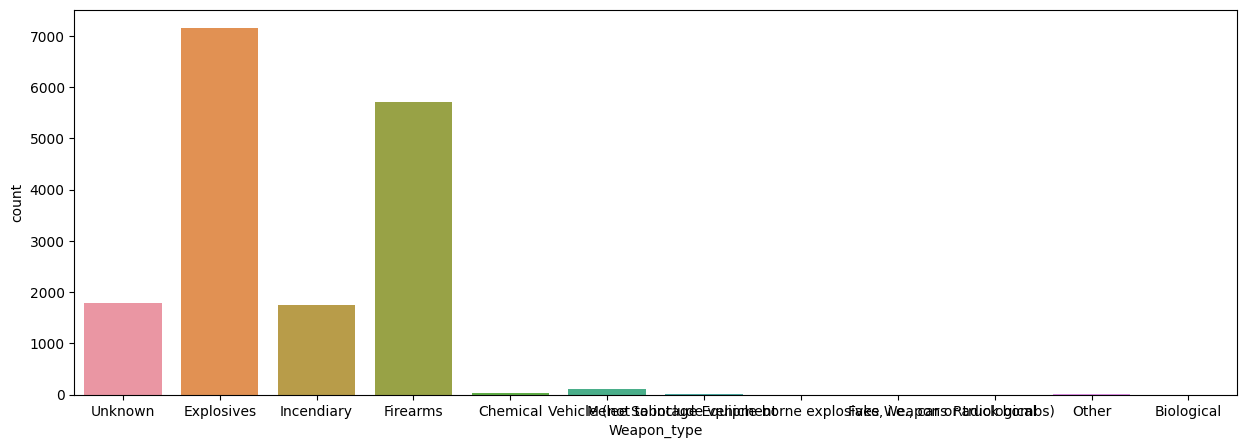

In [ ]:
plt.figure(figsize=(15,5));
sns.countplot(x=df.Weapon_type);

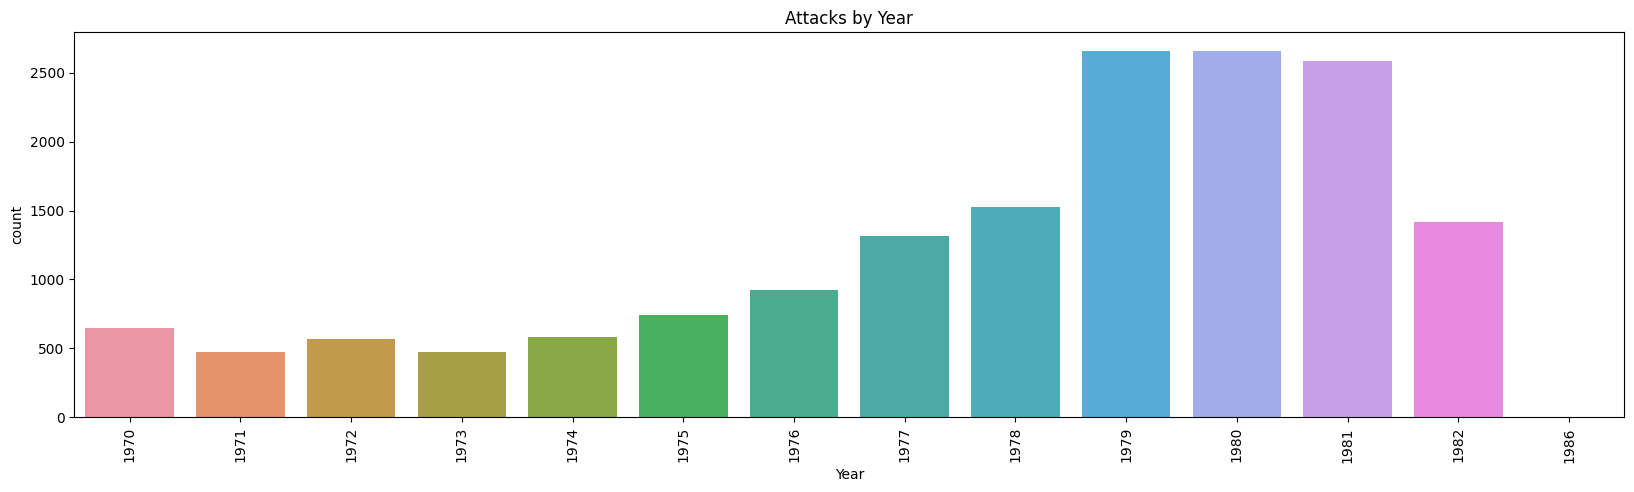

In [ ]:
plt.figure(figsize=(20,5));
plt.xticks(rotation = 90)
plt.title('Attacks by Year')
sns.countplot(x=df.Year);

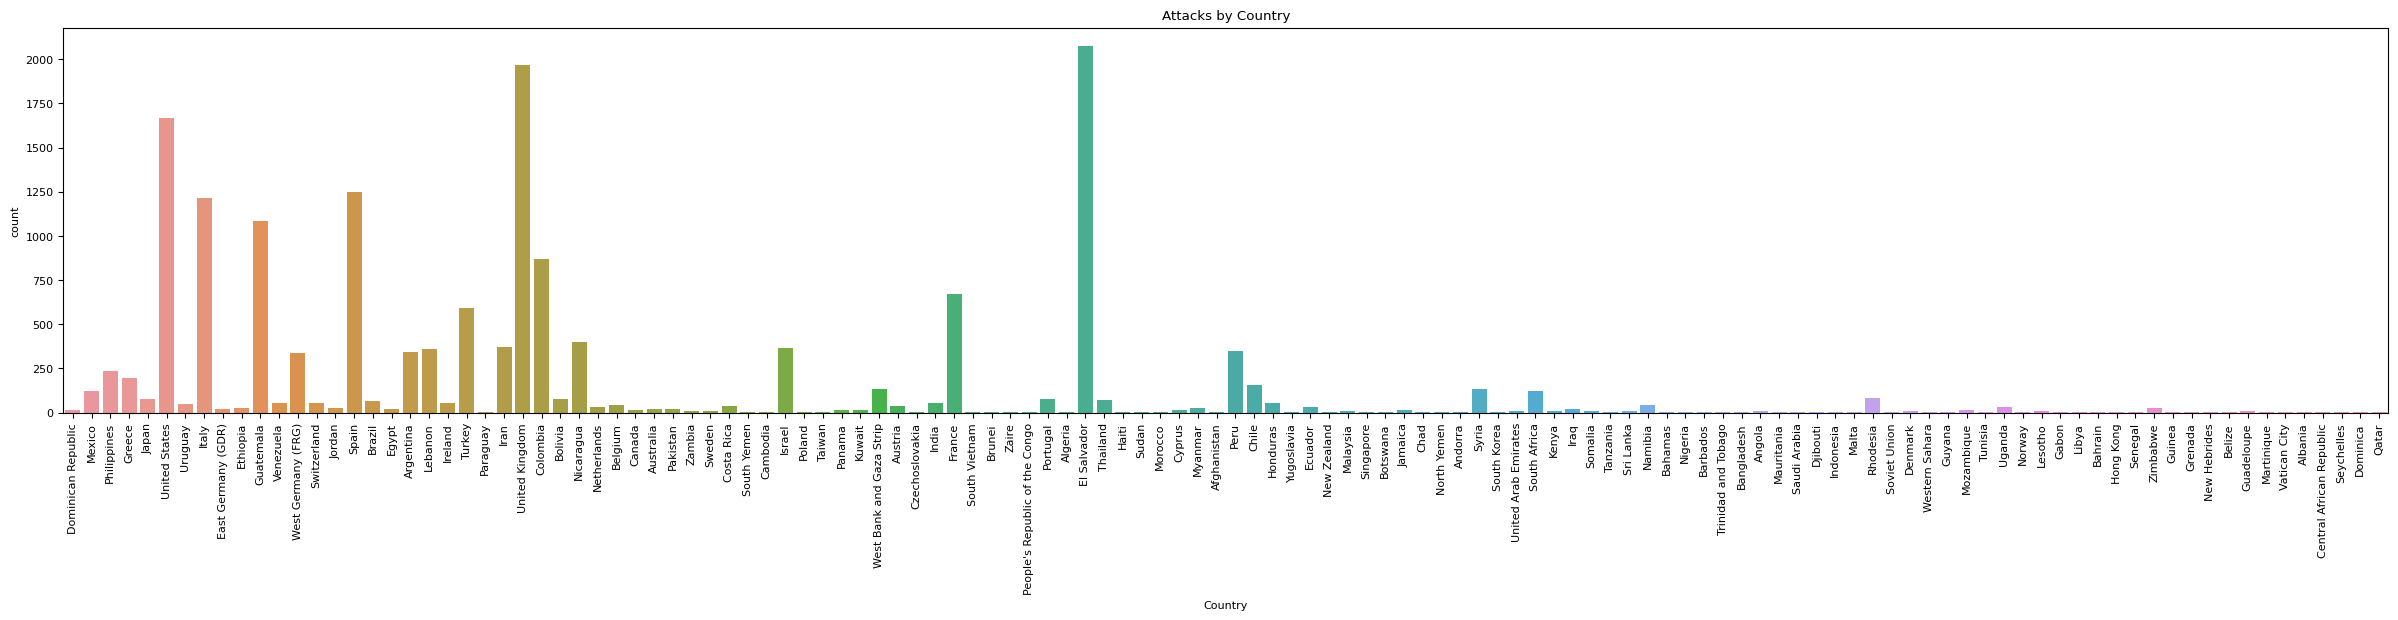

In [ ]:
plt.figure(figsize=(30,5));
plt.rcParams.update({'font.size':8});
plt.xticks(rotation = 90)
plt.title('Attacks by Country')
sns.countplot(x=df.Country);

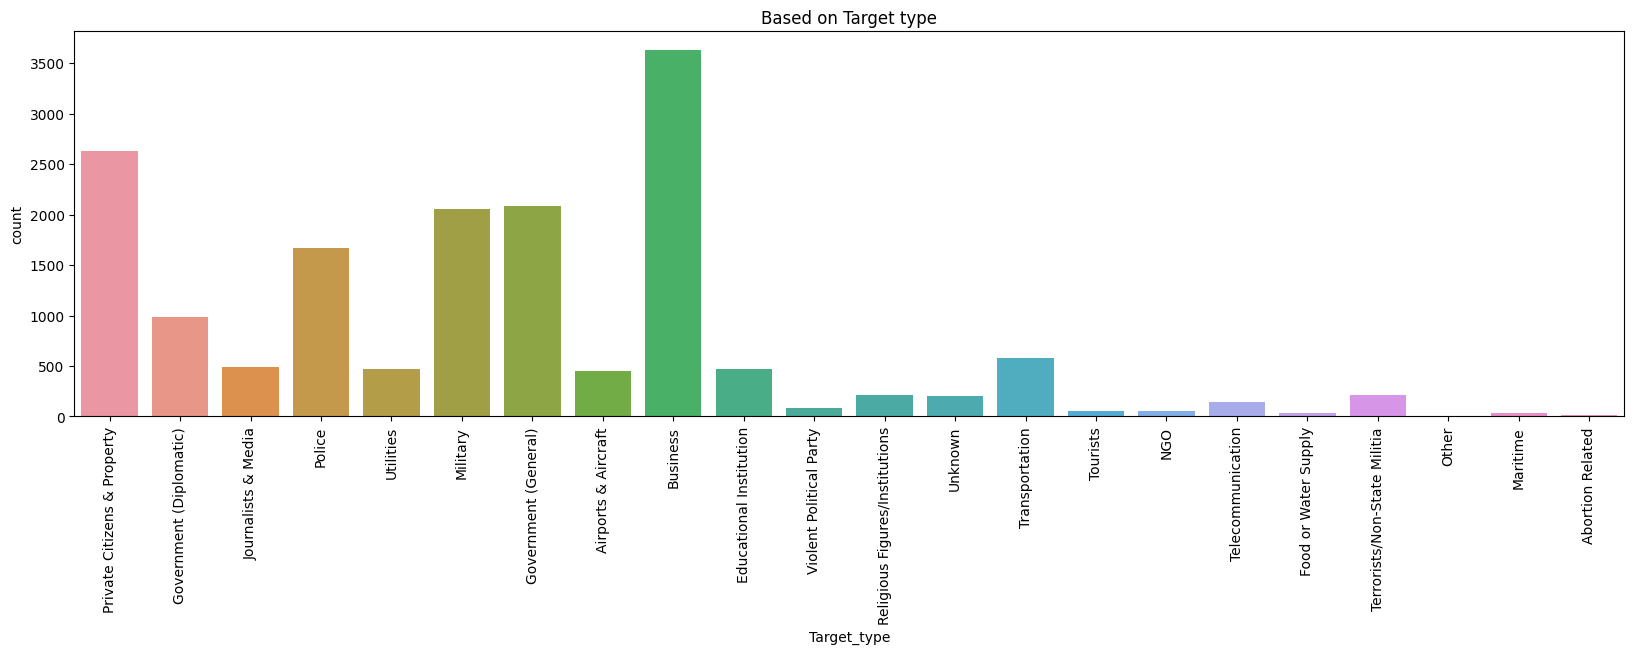

In [ ]:
plt.figure(figsize=(20,5));
plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 90)
plt.title('Based on Target type')
sns.countplot(x=df.Target_type);